# End-to-End Machine Learning Project

In [1]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

## Downloading the data

In [2]:

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)

    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

## Take a Quick Look at the Data Structure

In [4]:
housing = load_housing_data()
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

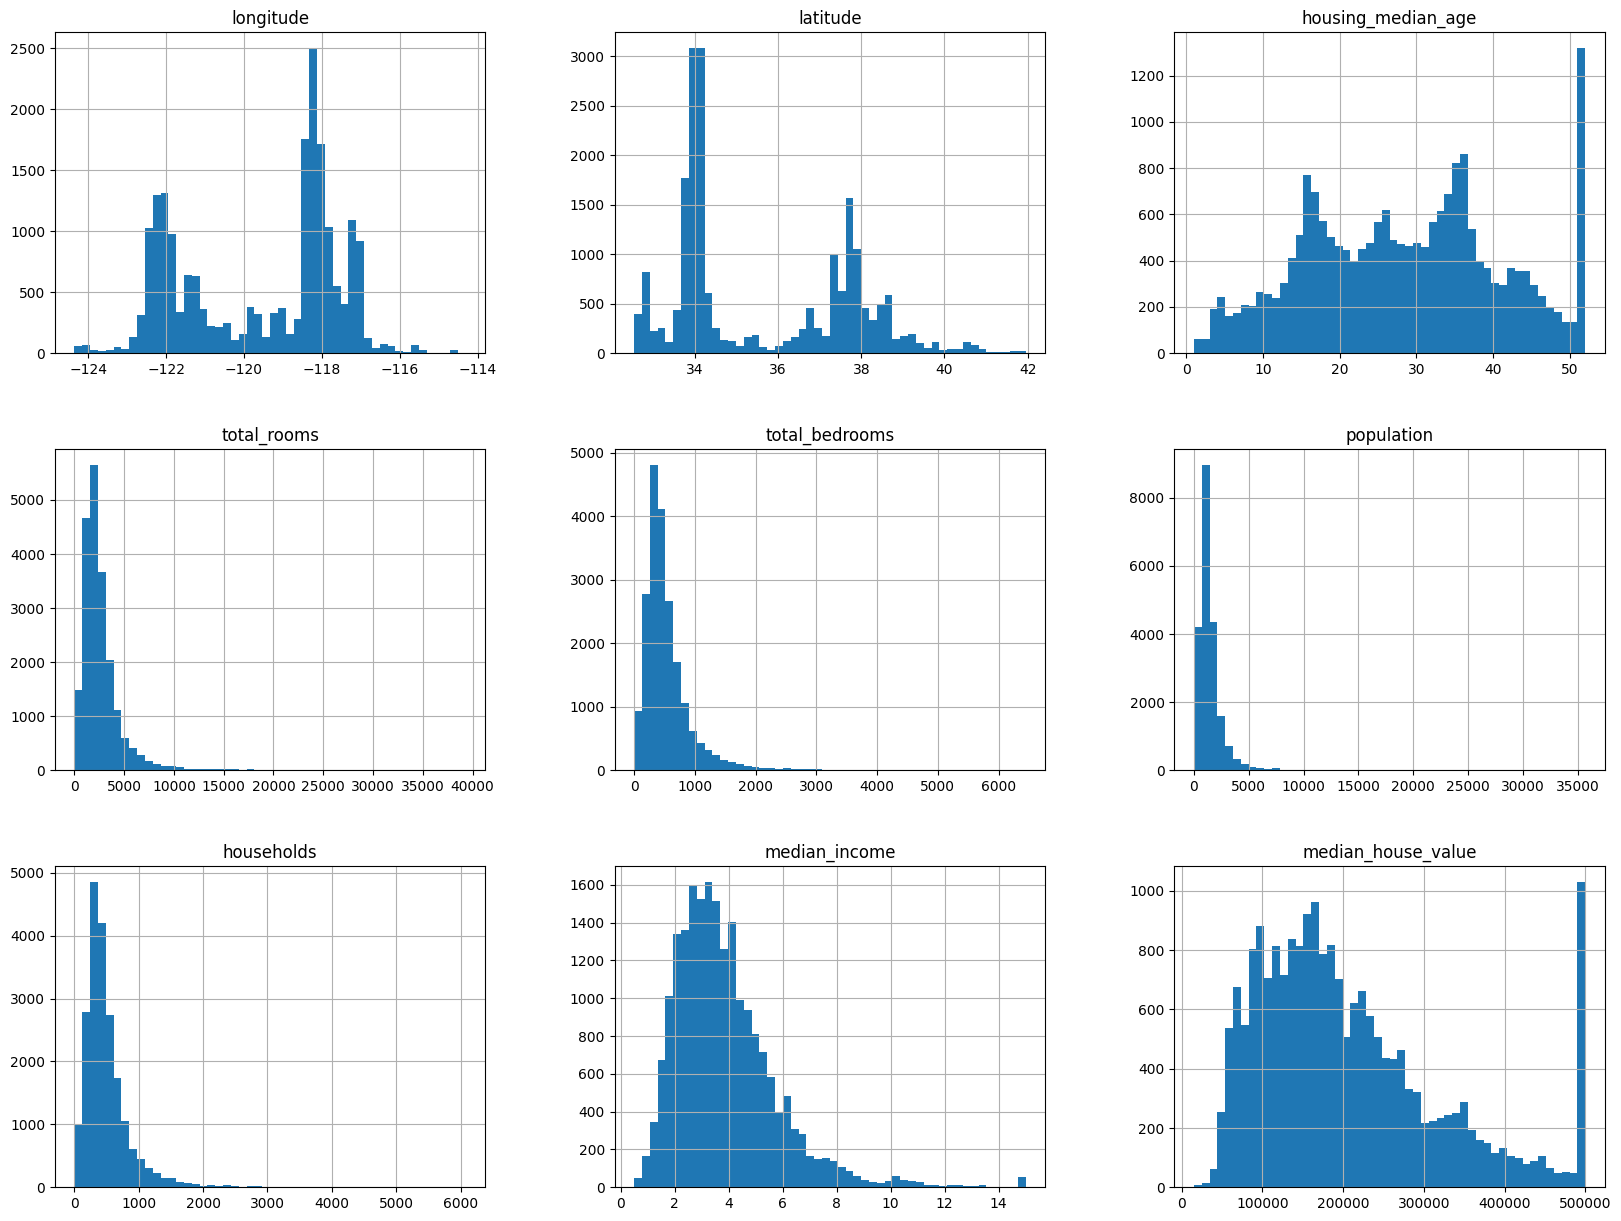

In [8]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

## Create a Test Set

In [9]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_idx = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_idx = shuffled_idx[:test_set_size]
    train_idx = shuffled_idx[test_set_size:]
    return data.iloc[train_idx], data.iloc[test_idx]
    
train_set, test_set = split_train_test(housing, 0.2)
print("Housing len", len(housing))
print("Test len", len(test_set))
print("Train len", len(train_set))

Housing len 20640
Test len 4128
Train len 16512


In [10]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [11]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

<Axes: >

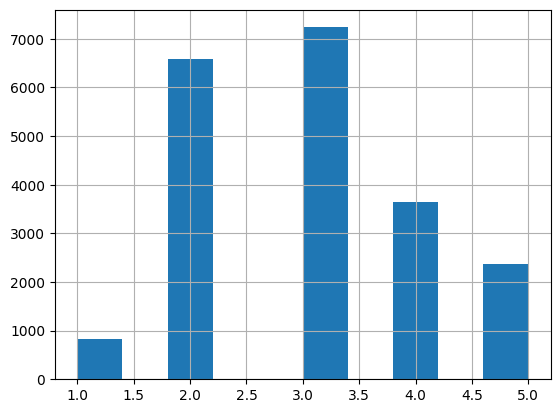

In [13]:
housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1,2,3,4,5]
)
housing["income_cat"].hist()

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [15]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [16]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Discover and Visualize the Data to Gain Insights

In [17]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

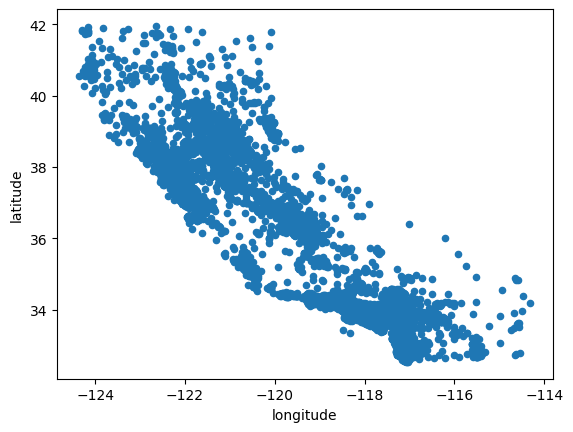

In [18]:
housing.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
)

<Axes: xlabel='longitude', ylabel='latitude'>

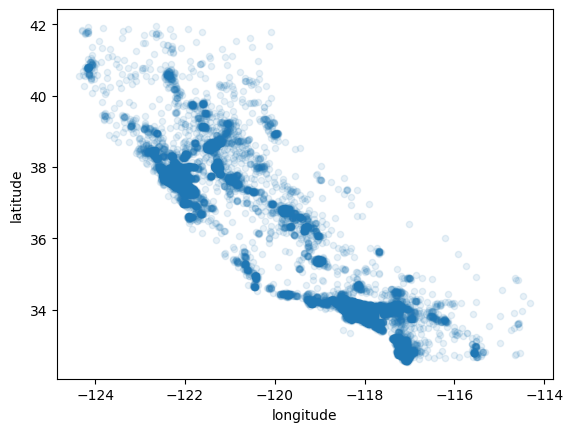

In [19]:
housing.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    alpha=0.1
)

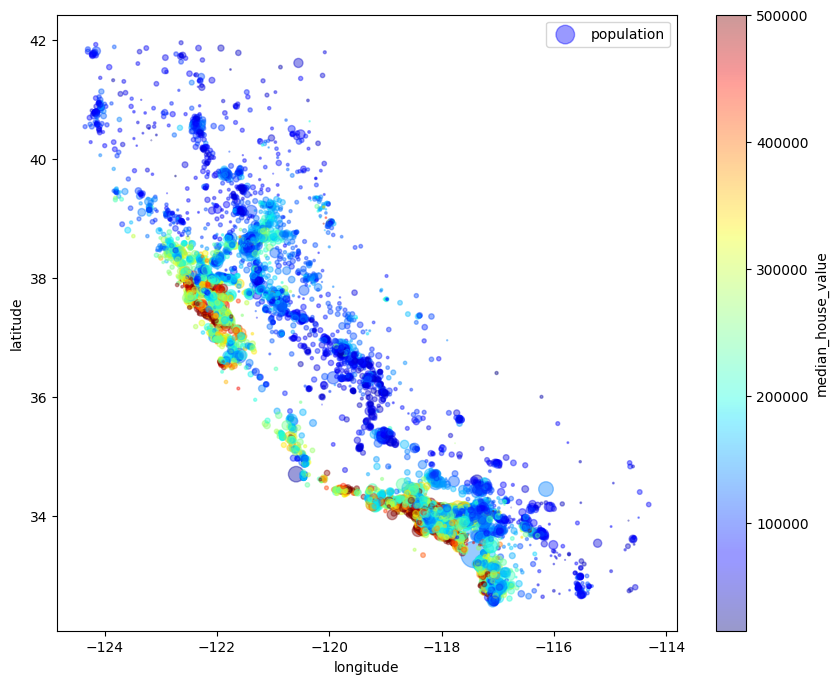

In [20]:
housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.4,
    s=housing["population"]/100,
    label="population",
    c="median_house_value",
    cmap=plt.get_cmap("jet"), colorbar=True,
    figsize=(10,8)
)
plt.legend()

## Looking for Correlations

In [21]:
# Column types
housing.head()

# Corr of all cols except ocean_proximity
corr_matrix = housing.loc[:, housing.columns != 'ocean_proximity'].corr()

In [22]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [23]:
corr_matrix

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105823     0.048909   
latitude            -0.924478  1.000000            0.005737    -0.039245   
housing_median_age  -0.105823  0.005737            1.000000    -0.364535   
total_rooms          0.048909 -0.039245           -0.364535     1.000000   
total_bedrooms       0.076686 -0.072550           -0.325101     0.929391   
population           0.108071 -0.115290           -0.298737     0.855103   
households           0.063146 -0.077765           -0.306473     0.918396   
median_income       -0.019615 -0.075146           -0.111315     0.200133   
median_house_value  -0.047466 -0.142673            0.114146     0.135140   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076686    0.108071    0.063146      -0.019615   
latitude                 -0.072550   -0.115290   -0.077765      -0.075146   
housing_median_age       -0.325101   -0.298737   -0.306473      -0.111315   
total_rooms               0.929391    0.855103    0.918396       0.200133   
total_bedrooms            1.000000    0.876324    0.980167      -0.009643   
population                0.876324    1.000000    0.904639       0.002421   
households                0.980167    0.904639    1.000000       0.010869   
median_income            -0.009643    0.002421    0.010869       1.000000   
median_house_value        0.047781   -0.026882    0.064590       0.687151   

                    median_house_value  
longitude                    -0.047466  
latitude                     -0.142673  
housing_median_age            0.114146  
total_rooms                   0.135140  
total_bedrooms                0.047781  
population                   -0.026882  
households                    0.064590  
median_income                 0.687151  
median_house_value            1.000000

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

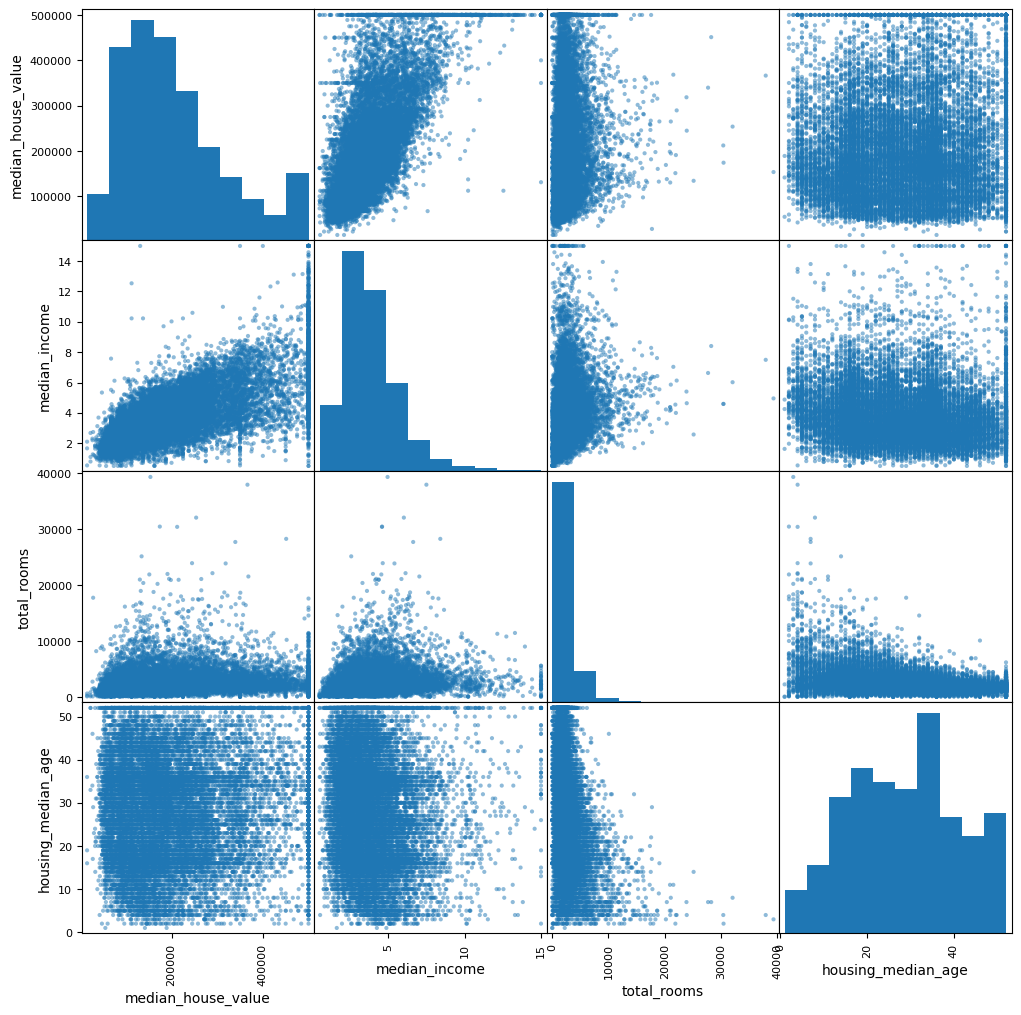

In [24]:
from pandas.plotting import scatter_matrix

attributes = [
    "median_house_value",
    "median_income",
    "total_rooms",
    "housing_median_age"
]

scatter_matrix(housing[attributes], figsize=(12,12))

<Axes: xlabel='median_income', ylabel='median_house_value'>

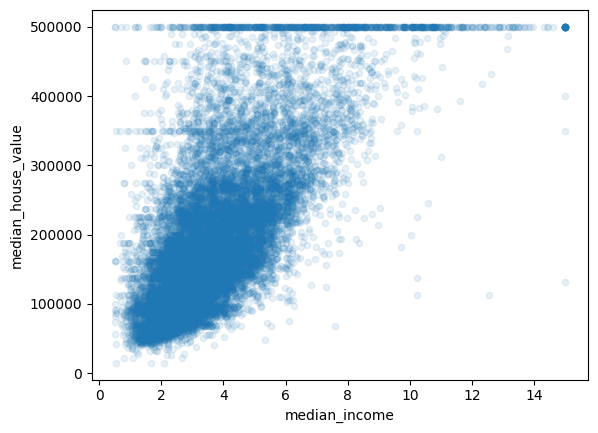

In [25]:
housing.plot(
    kind="scatter",
    x="median_income",
    y="median_house_value",
    alpha=0.1
)

In [26]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]
housing["bedrooms_per_household"] = housing["total_bedrooms"]/housing["households"]

In [27]:
corr_matrix = housing.loc[:, housing.columns != 'ocean_proximity'].corr()

In [28]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
bedrooms_per_household     -0.043349
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

## Prepare the Data for Machine Learning Algorithms

In [29]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [30]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [31]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [32]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [33]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [34]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [35]:
X = imputer.transform(housing_num)
X

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [36]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -121.46     38.52                29.0       3873.0           797.0   
1    -117.23     33.09                 7.0       5320.0           855.0   
2    -119.04     35.37                44.0       1618.0           310.0   
3    -117.13     32.75                24.0       1877.0           519.0   
4    -118.70     34.28                27.0       3536.0           646.0   

   population  households  median_income  
0      2237.0       706.0         2.1736  
1      2015.0       768.0         6.3373  
2       667.0       300.0         2.8750  
3       898.0       483.0         2.2264  
4      1837.0       580.0         4.4964

In [37]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

ocean_proximity
12655          INLAND
15502      NEAR OCEAN
2908           INLAND
14053      NEAR OCEAN
20496       <1H OCEAN
1481         NEAR BAY
18125       <1H OCEAN
5830        <1H OCEAN
17989       <1H OCEAN
4861        <1H OCEAN

In [38]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [39]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [40]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

## Custom Transformers

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]

        return np.c_[X, rooms_per_household, population_per_household]

In [42]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

## Transformation Pipelines

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_reader', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit(housing_num)

In [44]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

## Select and Train a Model

### Training and Evaluating on the Training Set

In [45]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [46]:
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [47]:
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [48]:
from sklearn.metrics import mean_squared_error
housing_predicitons = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predicitons)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [49]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [50]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Better evaluation using cross-validation

Scikit-Learn’s cross-validation features expect a utility function
(greater is better) rather than a cost function (lower is better), so
the scoring function is actually the opposite of the MSE (i.e., a neg‐
ative value), which is why the preceding code computes -scores
before calculating the square root.

In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    tree_reg,
    housing_prepared,
    housing_labels,
    scoring="neg_mean_squared_error",
    cv=10
)
tree_rmse_scores = np.sqrt(-scores)

In [52]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("SD:", scores.std())

display_scores(tree_rmse_scores)

Scores: [73000.44886704 69764.67854895 67665.69759168 71684.43790981
 71054.49563801 76514.4432492  72142.46033095 72312.86882022
 68083.0380789  69856.3828204 ]
Mean: 71207.89518551537
SD: 2448.245491177069


In [53]:
lin_scores = cross_val_score(
    lin_reg,
    housing_prepared,
    housing_labels,
    scoring="neg_mean_squared_error",
    cv=10
)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
SD: 2880.3282098180666


## Fine-Tune Your Model

### Grid Search

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    {"n_estimators" : [100, 150], "max_features": [4,6,8]},
    {"bootstrap": [False], "n_estimators": [3, 10], "max_features": [2,3,4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(
    forest_reg,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    verbose=10
)

grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START max_features=4, n_estimators=100...........................
[CV 1/5; 1/12] END max_features=4, n_estimators=100;, score=(train=-344784621.403, test=-2443350549.891) total time=   4.8s
[CV 2/5; 1/12] START max_features=4, n_estimators=100...........................
[CV 2/5; 1/12] END max_features=4, n_estimators=100;, score=(train=-349331791.764, test=-2342349046.599) total time=   4.8s
[CV 3/5; 1/12] START max_features=4, n_estimators=100...........................
[CV 3/5; 1/12] END max_features=4, n_estimators=100;, score=(train=-357362984.682, test=-2386339579.406) total time=   4.8s
[CV 4/5; 1/12] START max_features=4, n_estimators=100...........................
[CV 4/5; 1/12] END max_features=4, n_estimators=100;, score=(train=-347540433.895, test=-2488920219.310) total time=   4.8s
[CV 5/5; 1/12] START max_features=4, n_estimators=100...........................
[CV 5/5; 1/12] END max_features=4, n_e

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [4, 6, 8],
                          'n_estimators': [100, 150]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=10)

In [57]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 150}

In [58]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=150)

In [59]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49447.63301324151 {'max_features': 4, 'n_estimators': 100}
49561.539457168015 {'max_features': 4, 'n_estimators': 150}
49216.44362213953 {'max_features': 6, 'n_estimators': 100}
49276.754550818325 {'max_features': 6, 'n_estimators': 150}
49340.75252216714 {'max_features': 8, 'n_estimators': 100}
49129.11902416012 {'max_features': 8, 'n_estimators': 150}
62457.38302640532 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54460.376841260586 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59556.942510664594 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52779.619350884364 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
58141.91311385429 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
51491.06739944485 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


### Analyze the Best Models and Their Errors

In [60]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.94484796e-02, 6.35659324e-02, 4.27387161e-02, 1.57464170e-02,
       1.47958664e-02, 1.53061323e-02, 1.45292232e-02, 3.77436301e-01,
       4.62872262e-02, 1.12538631e-01, 6.05236812e-02, 6.83747672e-03,
       1.54754072e-01, 1.01791232e-04, 2.32778097e-03, 3.06227247e-03])

In [61]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3774363007823359, 'median_income'),
 (0.15475407224633755, 'INLAND'),
 (0.11253863123297482, 'pop_per_hhold'),
 (0.06944847955211186, 'longitude'),
 (0.06356593242124062, 'latitude'),
 (0.06052368118525027, 'bedrooms_per_room'),
 (0.04628722617289956, 'rooms_per_hhold'),
 (0.04273871609264903, 'housing_median_age'),
 (0.015746417002542454, 'total_rooms'),
 (0.015306132321957107, 'population'),
 (0.014795866422111002, 'total_bedrooms'),
 (0.014529223186947925, 'households'),
 (0.006837476716260911, '<1H OCEAN'),
 (0.003062272465559358, 'NEAR OCEAN'),
 (0.0023277809663491827, 'NEAR BAY'),
 (0.00010179123247246181, 'ISLAND')]

## Evaluate Your System on the Test Set

In [62]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [63]:
final_rmse

47007.78191115145

In [64]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(
    confidence,
    len(squared_errors)-1,
    loc=squared_errors.mean(),
    scale=stats.sem(squared_errors)
))

array([45028.11751465, 48907.37933584])

In [65]:
# Get precision of model r2
from sklearn.metrics import r2_score
r2_score(y_test, final_predictions)

0.8304529960160435